In [1]:
import os
import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Loading data

NOTE: this notebook only pertains to model performance on Spanish and Finnish languages, as well as transfer learning instances _from_ Spanish or Finnish to the other languages we consider. The languages we're working with are: English, Spanish, Italian, Finnish, Dutch, Croatian.

In [2]:
spanish_preds = pkl.load(open('../data/model_predictions/spanish_preds.p', 'rb'))
spanish_labels = pkl.load(open('../data/model_predictions/spanish_labels.p', 'rb'))

finnish_preds = pkl.load(open('../data/model_predictions/finnish_preds.p', 'rb'))
finnish_labels = pkl.load(open('../data/model_predictions/finnish_labels.p', 'rb'))

# spanish predictions on other language data before training
spanish2english_preds_bt = pkl.load(open('../data/model_predictions/spanish2english_preds-no_train.p', 'rb'))
spanish2english_labels_bt = pkl.load(open('../data/model_predictions/spanish2english_labels-no_train.p', 'rb'))
spanish2finnish_preds_bt = pkl.load(open('../data/model_predictions/spanish2finnish_preds-no_train.p', 'rb'))
spanish2finnish_labels_bt = pkl.load(open('../data/model_predictions/spanish2finnish_labels-no_train.p', 'rb'))
spanish2italian_preds_bt = pkl.load(open('../data/model_predictions/spanish2italian_preds-no_train.p', 'rb'))
spanish2italian_labels_bt = pkl.load(open('../data/model_predictions/spanish2italian_labels-no_train.p', 'rb'))
spanish2dutch_preds_bt = pkl.load(open('../data/model_predictions/spanish2dutch_preds-no_train.p', 'rb'))
spanish2dutch_labels_bt = pkl.load(open('../data/model_predictions/spanish2dutch_labels-no_train.p', 'rb'))
spanish2croatian_preds_bt = pkl.load(open('../data/model_predictions/spanish2croatian_preds-no_train.p', 'rb'))
spanish2croatian_labels_bt = pkl.load(open('../data/model_predictions/spanish2croatian_labels-no_train.p', 'rb'))

#spanish-base transfer learning to other language predictions.
spanish2english_preds = pkl.load(open('../data/model_predictions/spanish2english_preds.p', 'rb'))
spanish2english_labels = pkl.load(open('../data/model_predictions/spanish2english_labels.p', 'rb'))
spanish2finnish_preds = pkl.load(open('../data/model_predictions/spanish2finnish_preds.p', 'rb'))
spanish2finnish_labels = pkl.load(open('../data/model_predictions/spanish2finnish_labels.p', 'rb'))
spanish2croatian_preds = pkl.load(open('../data/model_predictions/spanish2croatian_preds.p', 'rb'))
spanish2croatian_labels = pkl.load(open('../data/model_predictions/spanish2croatian_labels.p', 'rb'))
spanish2italian_preds = pkl.load(open('../data/model_predictions/spanish2italian_preds.p', 'rb'))
spanish2italian_labels = pkl.load(open('../data/model_predictions/spanish2italian_labels.p', 'rb'))
spanish2dutch_preds = pkl.load(open('../data/model_predictions/spanish2dutch_preds.p', 'rb'))
spanish2dutch_labels = pkl.load(open('../data/model_predictions/spanish2dutch_labels.p', 'rb'))

# finnish predictions on other language data before training
finnish2english_labels_bt = pkl.load(open('../data/model_predictions/finnish2english_labels-no_train.p', 'rb'))
finnish2english_preds_bt = pkl.load(open('../data/model_predictions/finnish2english_preds-no_train.p', 'rb'))
finnish2spanish_labels_bt = pkl.load(open('../data/model_predictions/finnish2spanish_labels-no_train.p', 'rb'))
finnish2spanish_preds_bt = pkl.load(open('../data/model_predictions/finnish2spanish_preds-no_train.p', 'rb'))
finnish2italian_labels_bt = pkl.load(open('../data/model_predictions/finnish2italian_labels-no_train.p', 'rb'))
finnish2italian_preds_bt = pkl.load(open('../data/model_predictions/finnish2italian_preds-no_train.p', 'rb'))
finnish2dutch_labels_bt = pkl.load(open('../data/model_predictions/finnish2dutch_labels-no_train.p', 'rb'))
finnish2dutch_preds_bt = pkl.load(open('../data/model_predictions/finnish2dutch_preds-no_train.p', 'rb'))
finnish2croatian_labels_bt = pkl.load(open('../data/model_predictions/finnish2croatian_labels-no_train.p', 'rb'))
finnish2croatian_preds_bt = pkl.load(open('../data/model_predictions/finnish2croatian_preds-no_train.p', 'rb'))

#finnish-base transfer learning to other language predictions.

finnish2english_preds = pkl.load(open('../data/model_predictions/finnish2english_preds.p', 'rb'))
finnish2english_labels = pkl.load(open('../data/model_predictions/finnish2english_labels.p', 'rb'))
finnish2spanish_preds = pkl.load(open('../data/model_predictions/finnish2spanish_preds.p', 'rb'))
finnish2spanish_labels = pkl.load(open('../data/model_predictions/finnish2spanish_labels.p', 'rb'))
finnish2croatian_preds = pkl.load(open('../data/model_predictions/finnish2croatian_preds.p', 'rb'))
finnish2croatian_labels = pkl.load(open('../data/model_predictions/finnish2croatian_labels.p', 'rb'))
finnish2italian_preds = pkl.load(open('../data/model_predictions/finnish2italian_preds.p', 'rb'))
finnish2italian_labels = pkl.load(open('../data/model_predictions/finnish2italian_labels.p', 'rb'))
finnish2dutch_preds = pkl.load(open('../data/model_predictions/finnish2dutch_preds.p', 'rb'))
finnish2dutch_labels = pkl.load(open('../data/model_predictions/finnish2dutch_labels.p', 'rb'))

# Heatmaps to examine test results

In [3]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers import normalizers
from tokenizers.normalizers import NFD, StripAccents

phoneme_tokenizer = Tokenizer.from_file("../data/token_encodings/phoneme_tokenizer-universal.json")
id_2_phone = {v:k for k, v in phoneme_tokenizer.get_vocab().items()}

In [4]:
def make_heatmap(preds, labels, title, fig_size=(20, 20)):
    matrix = confusion_matrix(labels, preds)
    phones = list(set(preds).union(set(labels)))
    id_2_phone = {v:k for k, v in phoneme_tokenizer.get_vocab().items()}
    all_phones = [id_2_phone[i] for i in phones]
    phones_confusion_matrix = pd.DataFrame(matrix, index=all_phones, columns=all_phones)
    fig = plt.figure(figsize=fig_size)
    plt.title(title, fontsize=18)
    sns.heatmap(phones_confusion_matrix, annot=True, cmap="rocket_r", fmt='g')
#     save_file = title + '.png'
#     fig.savefig(save_file, dpi = fig.dpi, facecolor=(1,1,1,1))

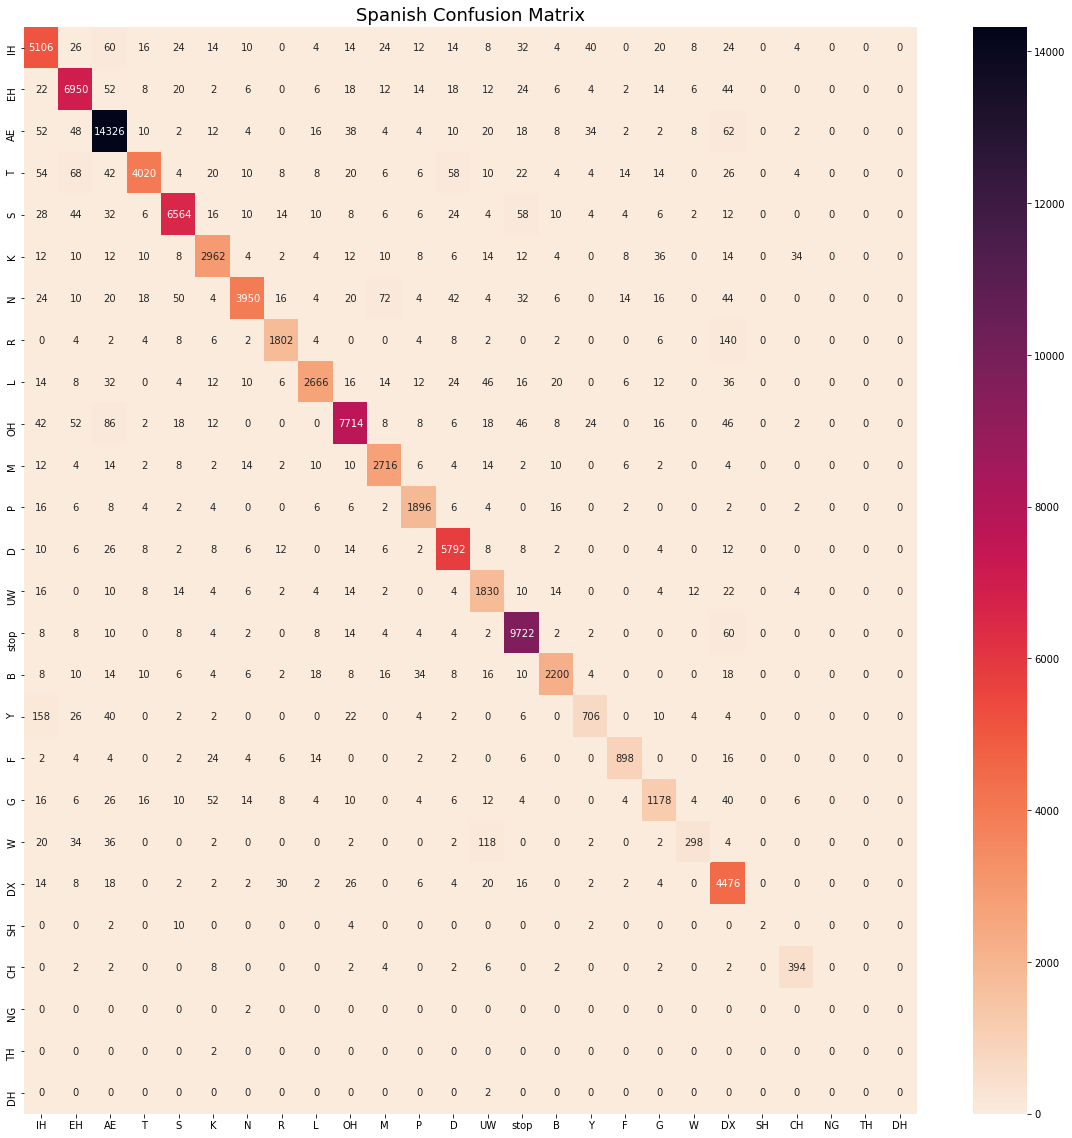

In [5]:
make_heatmap(spanish_preds, spanish_labels, 'Spanish Confusion Matrix')

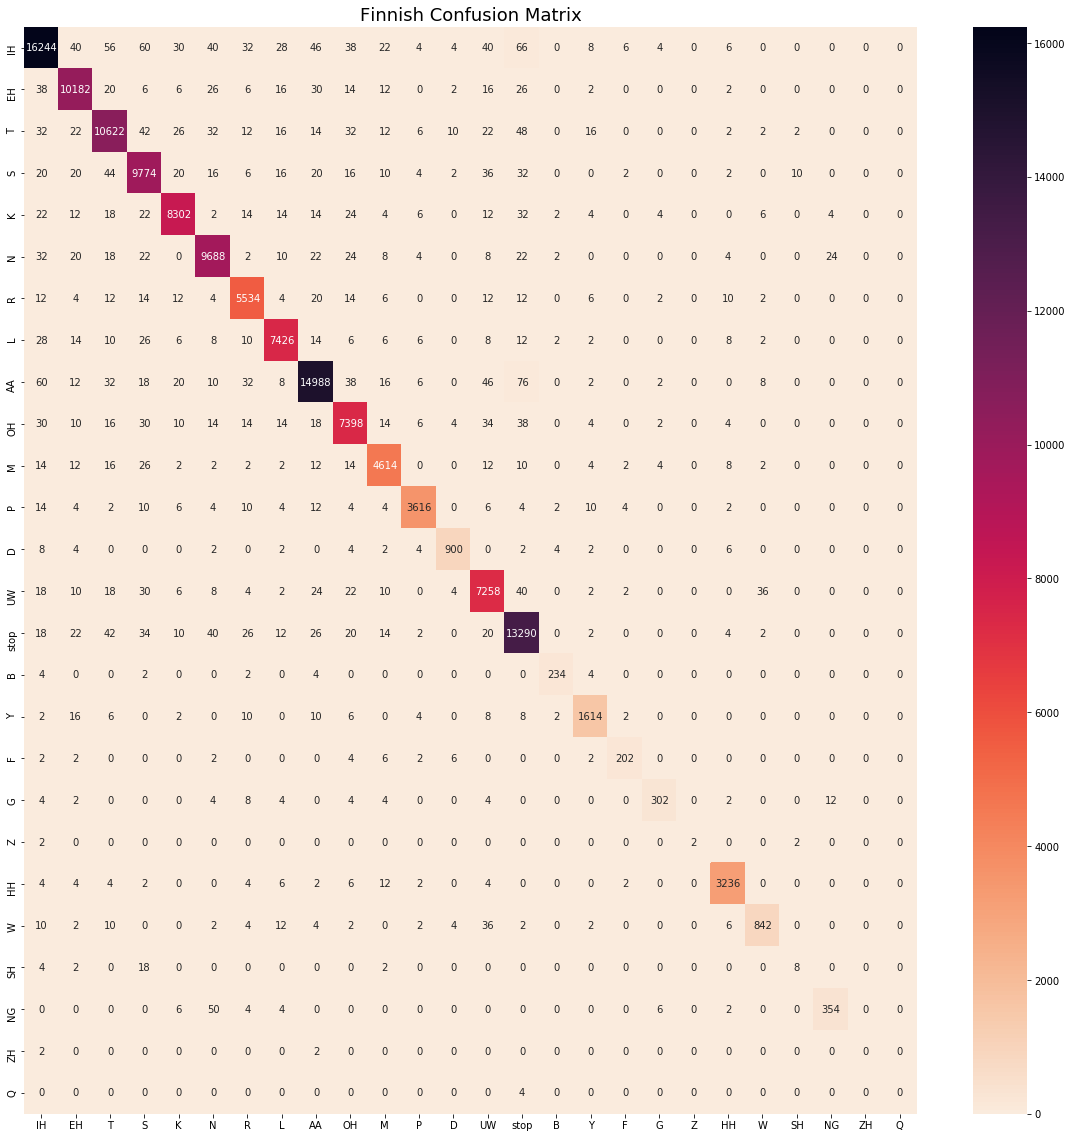

In [6]:
make_heatmap(finnish_preds, finnish_labels, 'Finnish Confusion Matrix')

# Transfer learning examples
Below heatmaps correspond to instance sof having trained a model on a base language. Then, afterward training on a second language and testing performance on that second language. So using Spanish and English as an example, we proceed as follows:
* train on Spanish
* use weights learned from Spanish training to train on English
* test performance on unseen English data


## Spanish-transfer learning

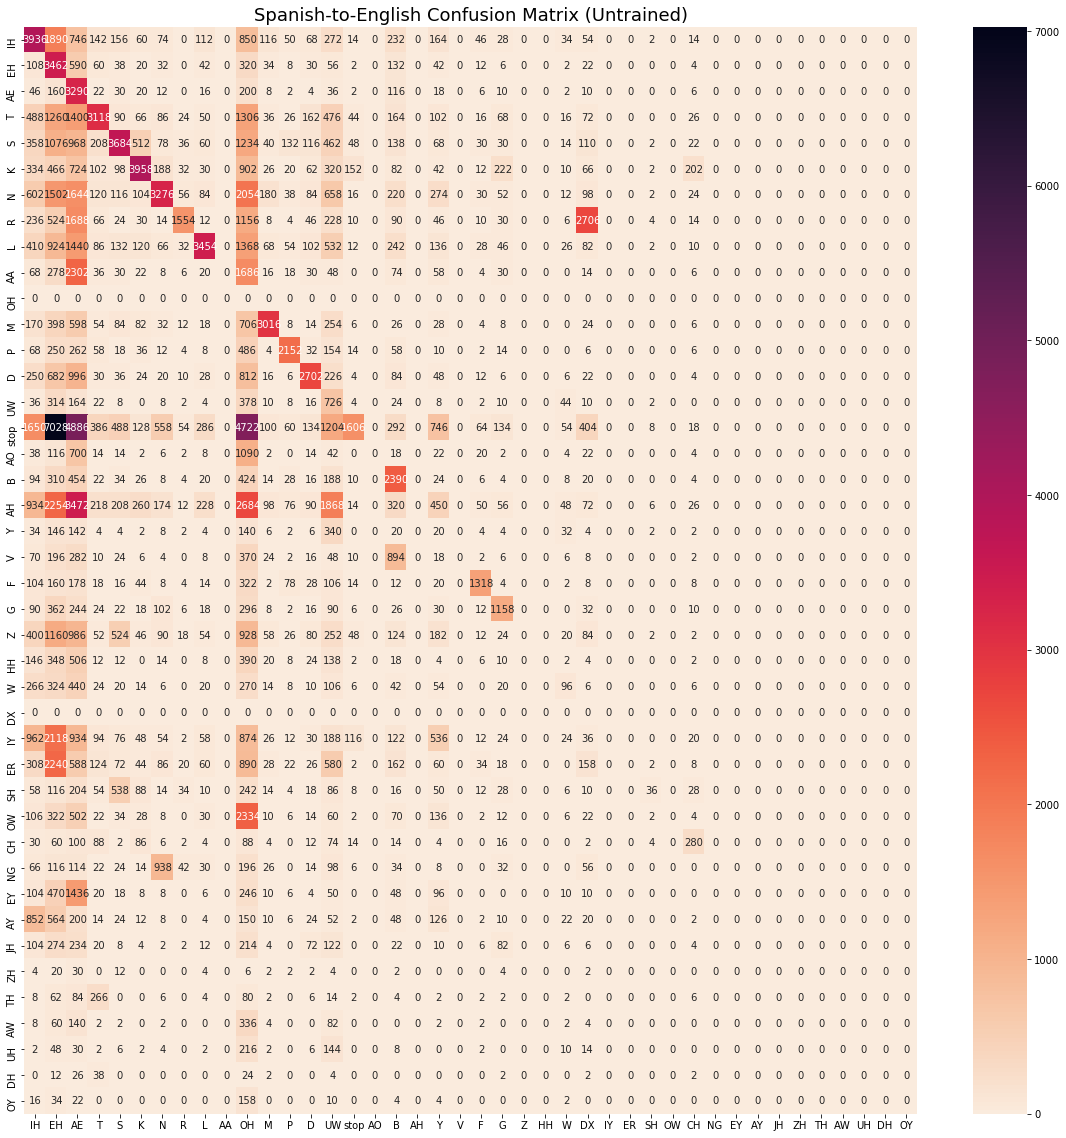

In [7]:
make_heatmap(spanish2english_preds_bt, spanish2english_labels_bt, 'Spanish-to-English Confusion Matrix (Untrained)')

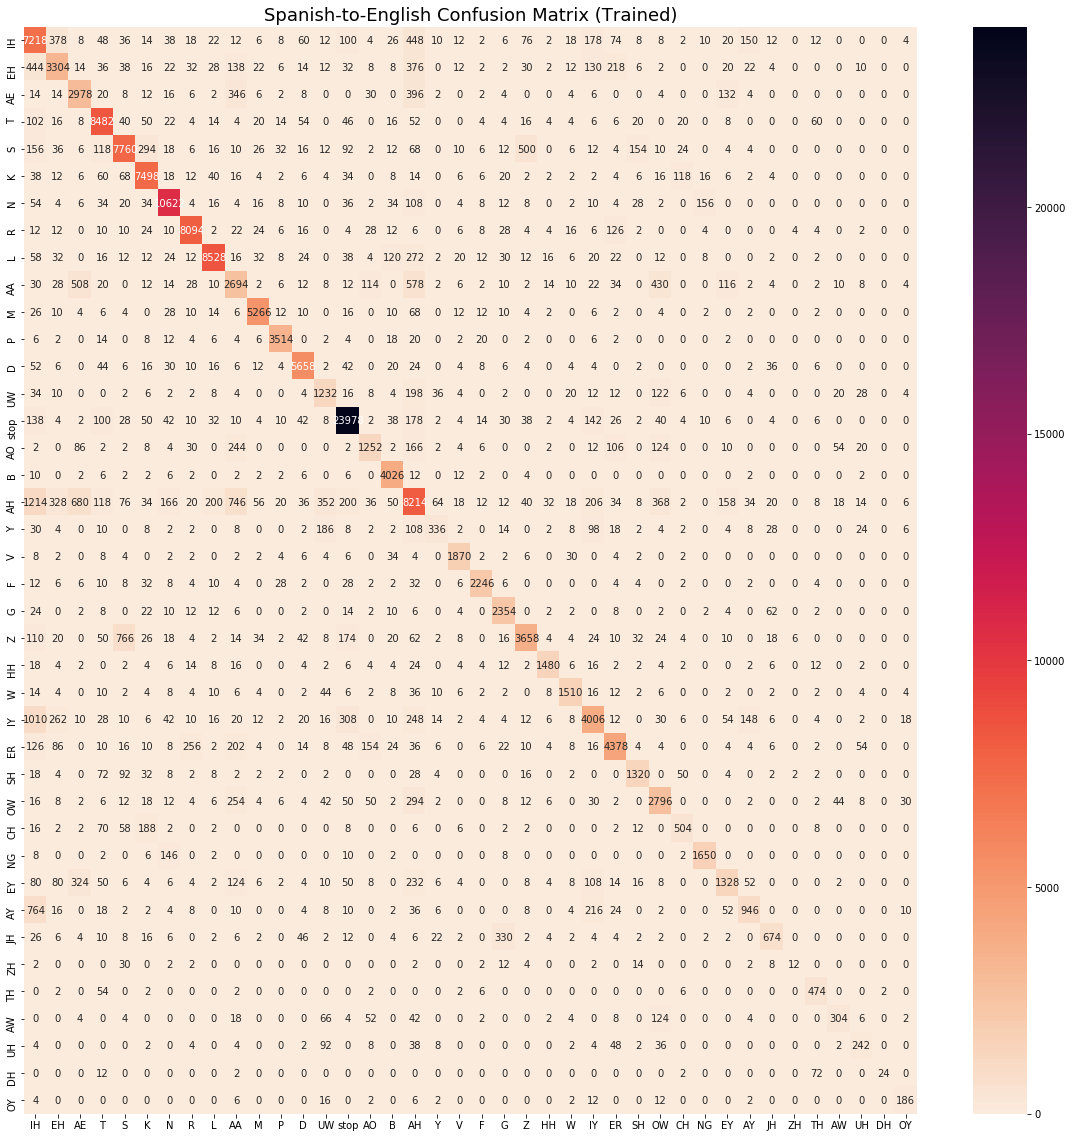

In [8]:
make_heatmap(spanish2english_preds, spanish2english_labels, 'Spanish-to-English Confusion Matrix (Trained)')

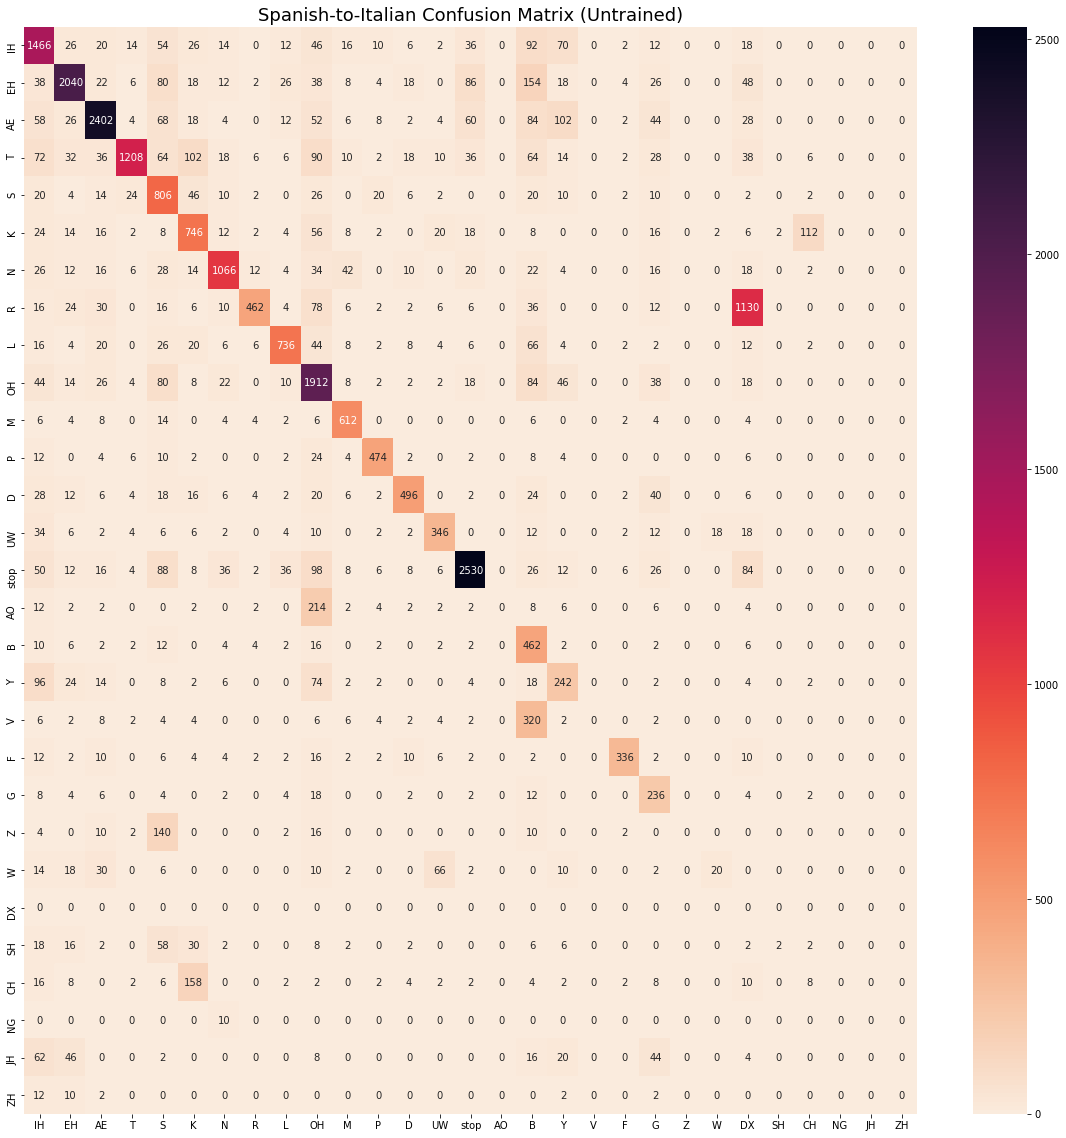

In [9]:
make_heatmap(spanish2italian_preds_bt, spanish2italian_labels_bt, 'Spanish-to-Italian Confusion Matrix (Untrained)')

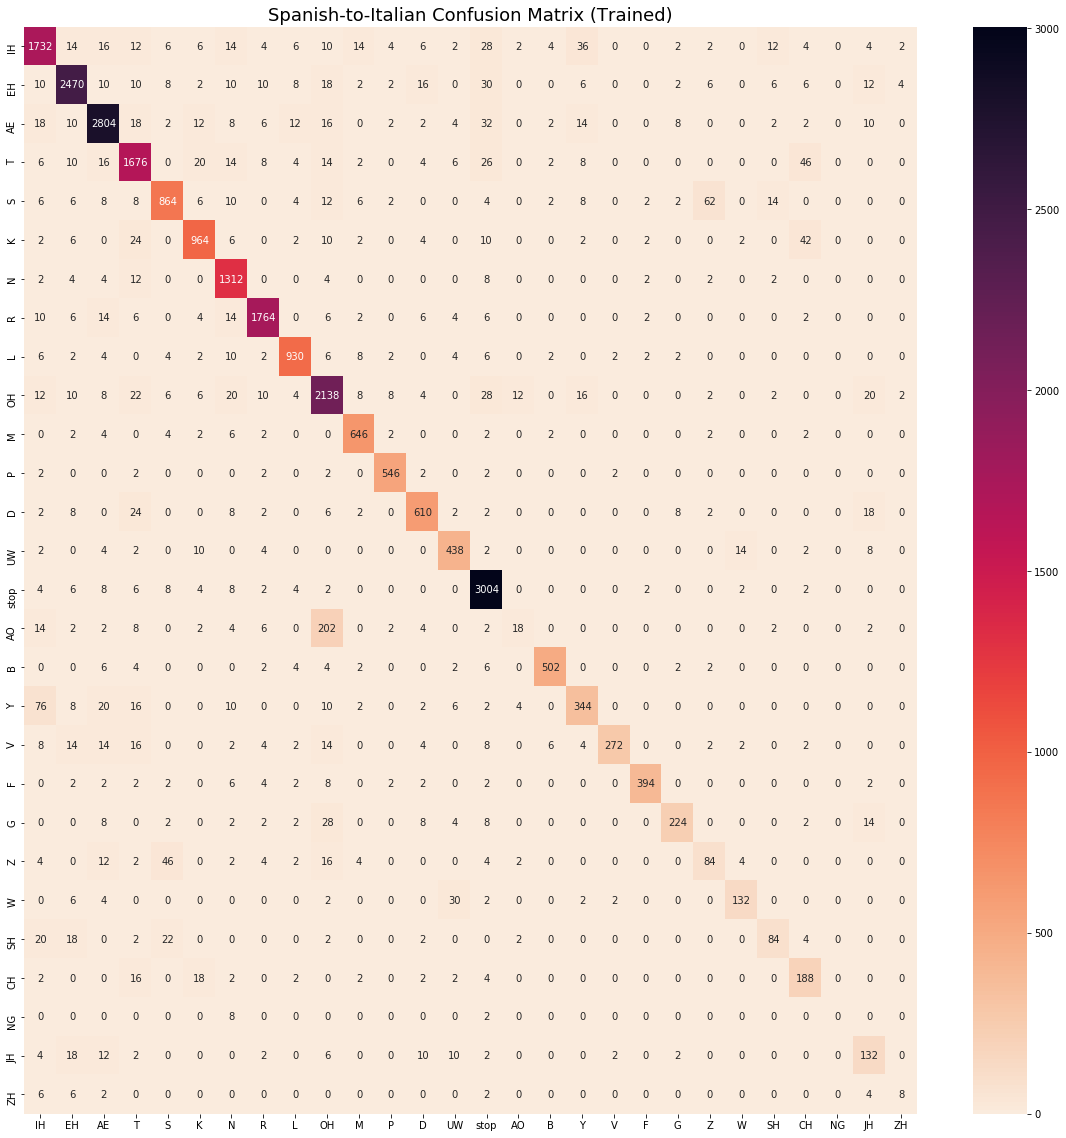

In [10]:
make_heatmap(spanish2italian_preds, spanish2italian_labels, 'Spanish-to-Italian Confusion Matrix (Trained)')

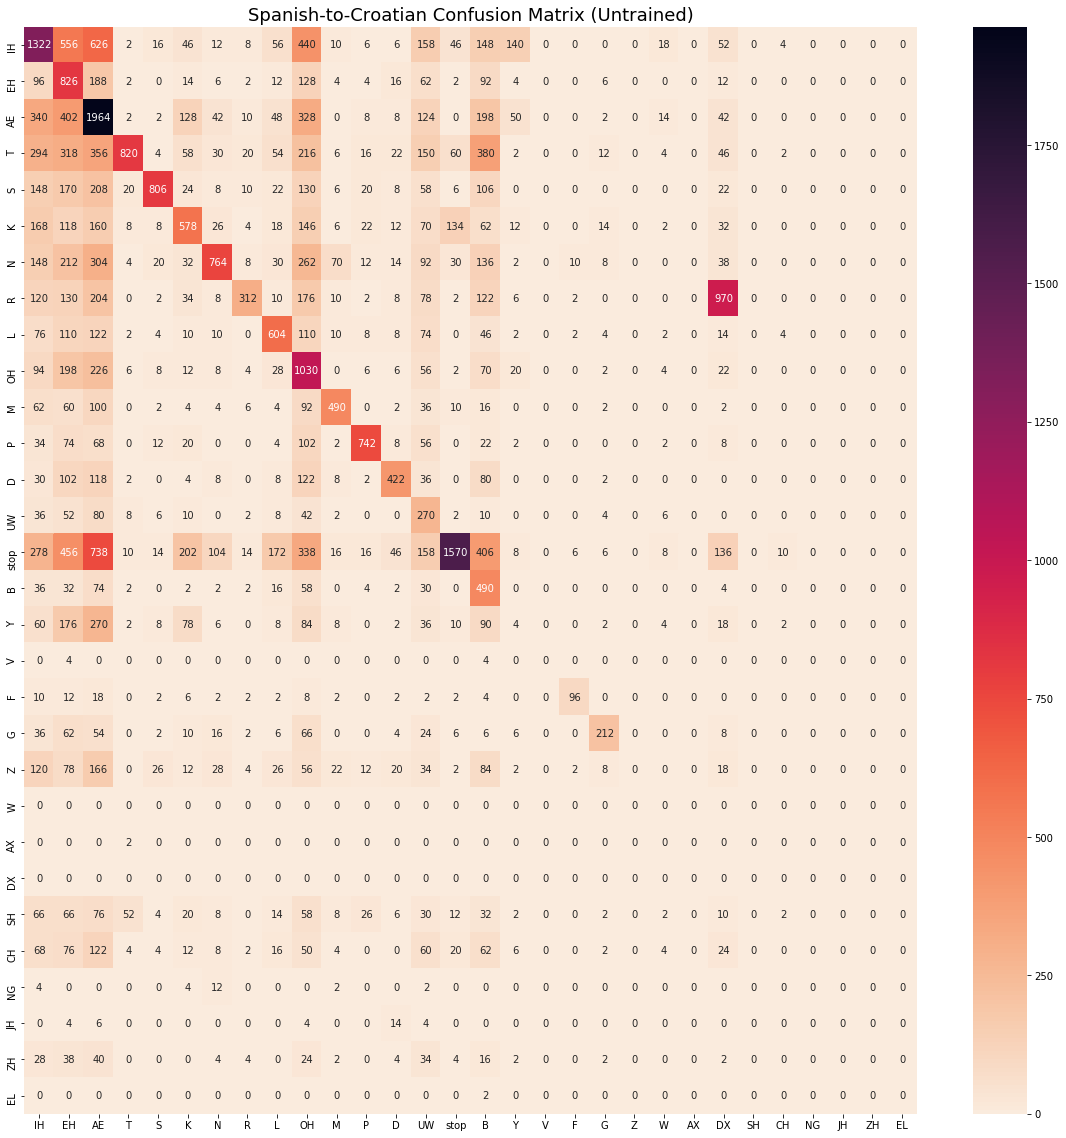

In [11]:
make_heatmap(spanish2croatian_preds_bt, spanish2croatian_labels_bt, 'Spanish-to-Croatian Confusion Matrix (Untrained)')

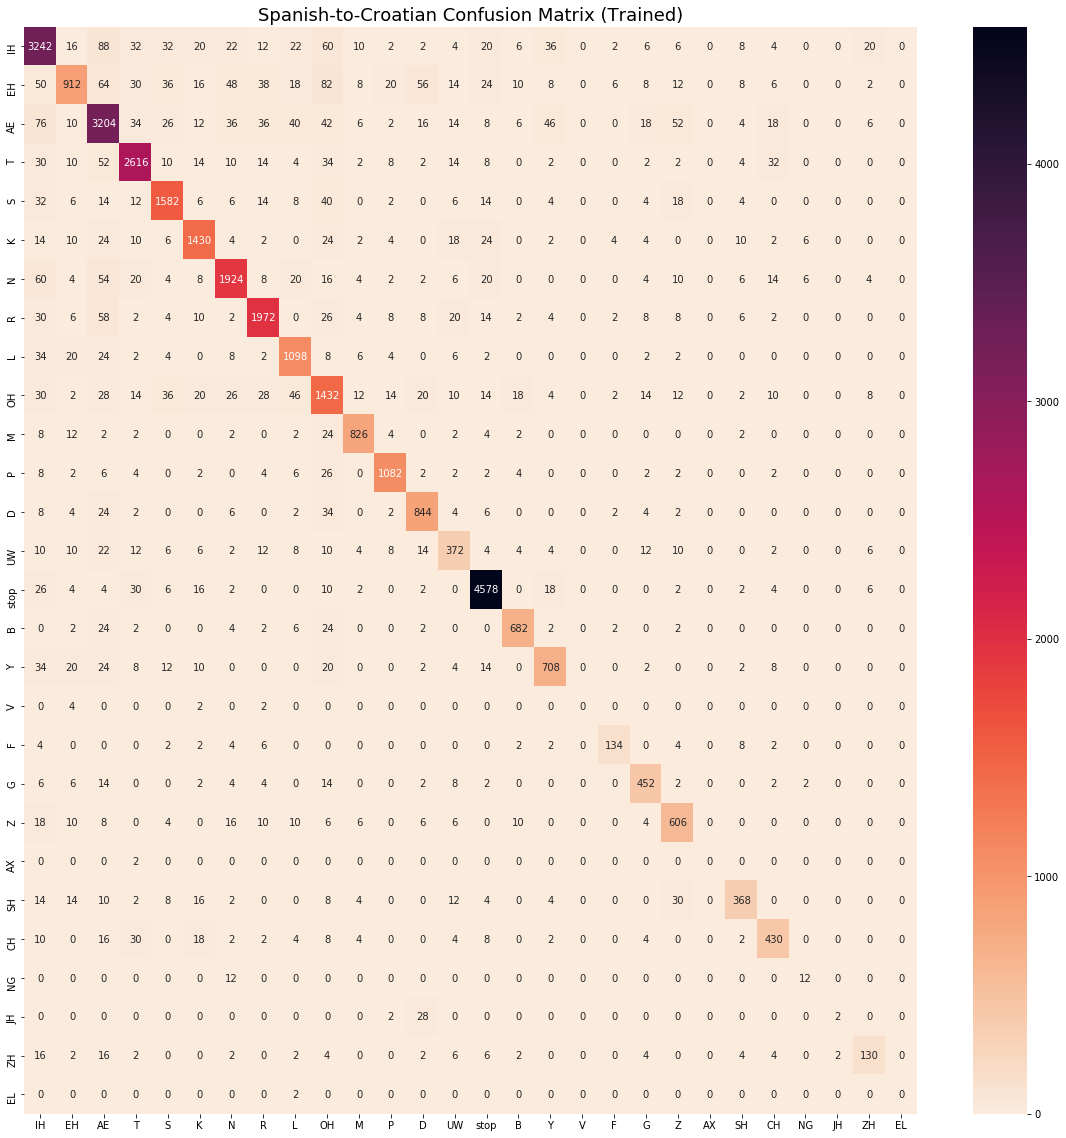

In [12]:
make_heatmap(spanish2croatian_preds, spanish2croatian_labels, 'Spanish-to-Croatian Confusion Matrix (Trained)')

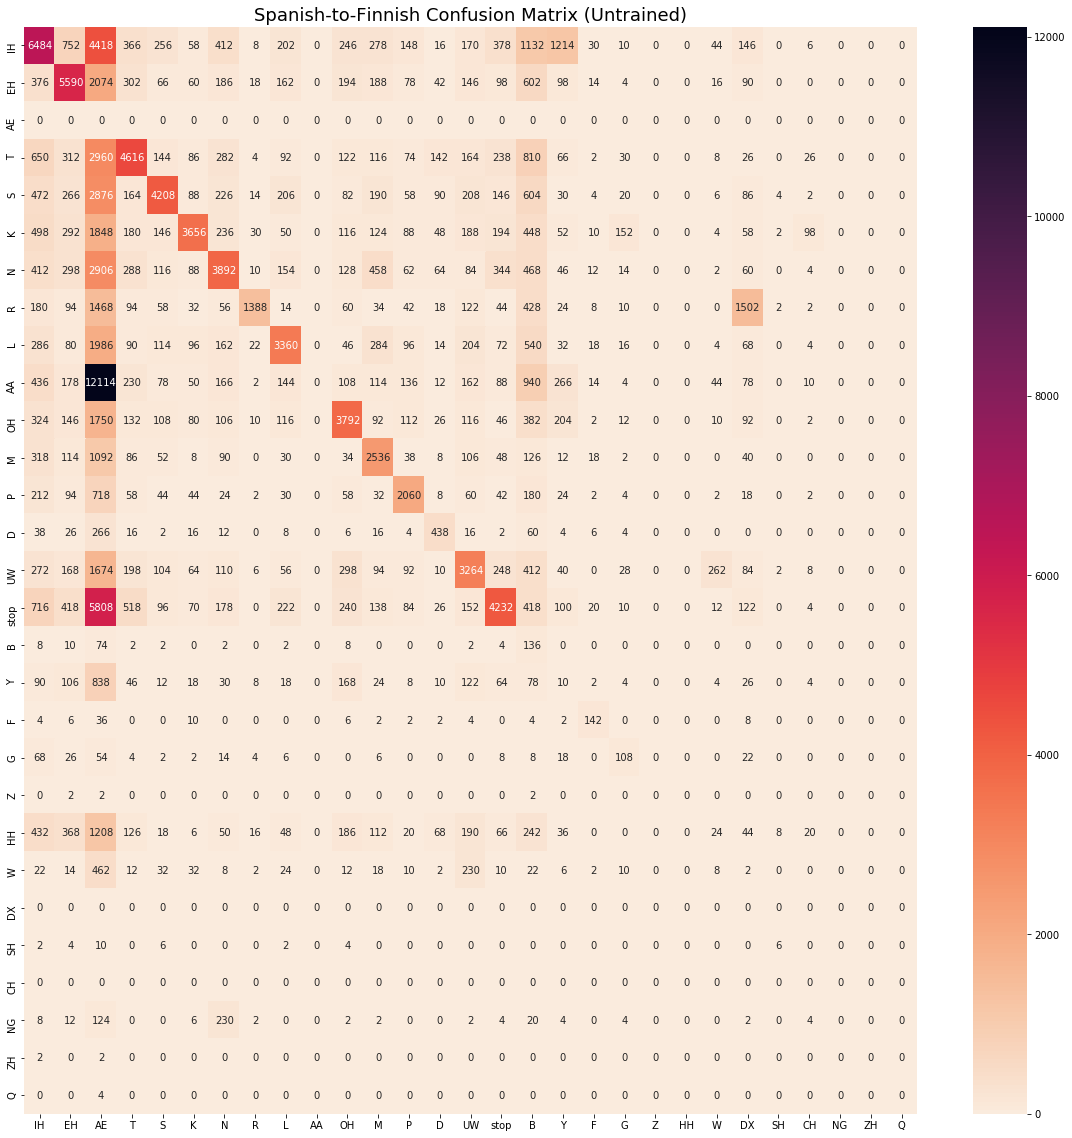

In [13]:
make_heatmap(spanish2finnish_preds_bt, spanish2finnish_labels_bt, 'Spanish-to-Finnish Confusion Matrix (Untrained)')

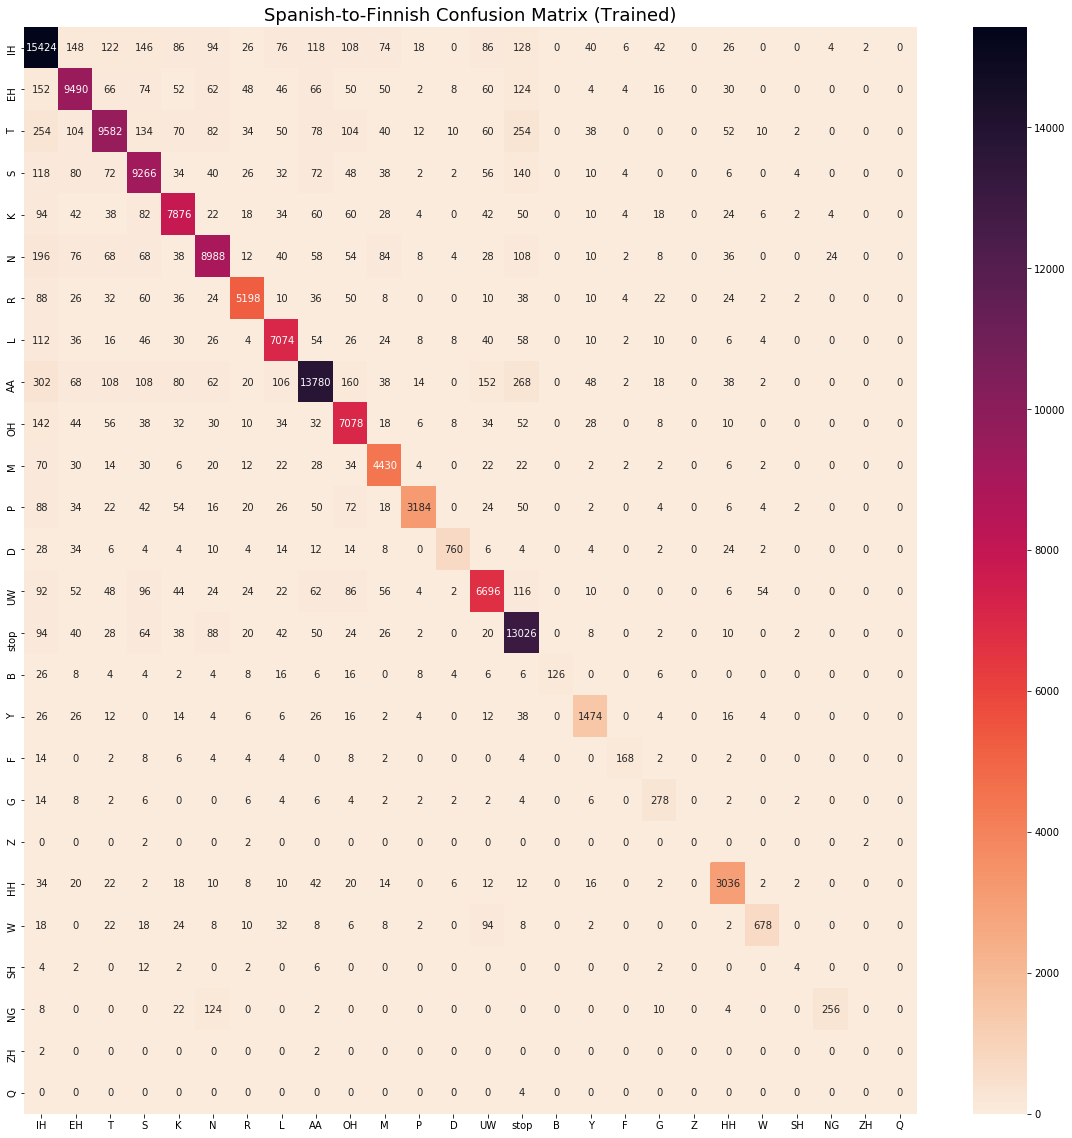

In [14]:
make_heatmap(spanish2finnish_preds, spanish2finnish_labels, 'Spanish-to-Finnish Confusion Matrix (Trained)')

## Finnish-transfer learning

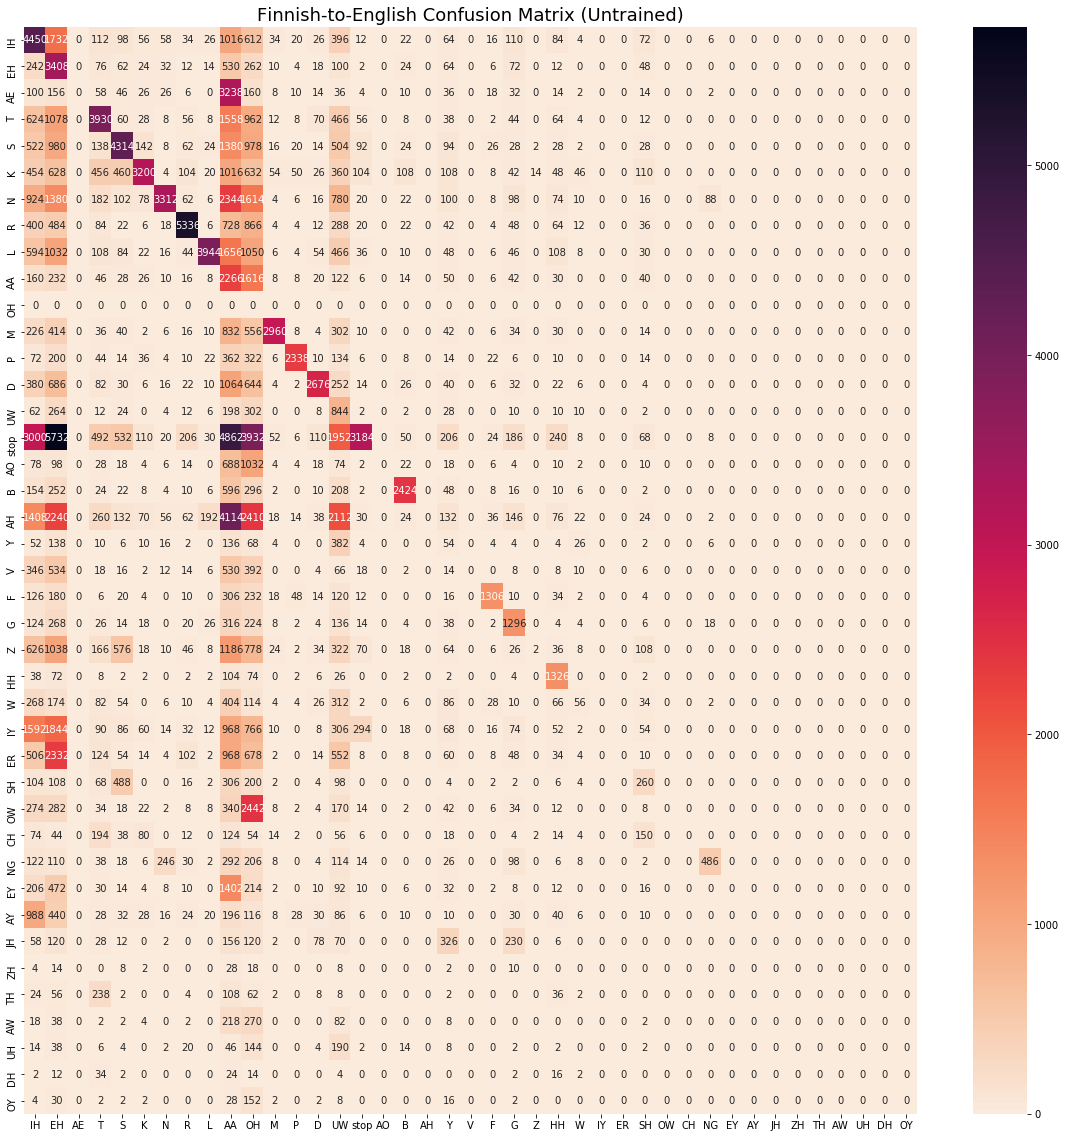

In [15]:
make_heatmap(finnish2english_preds_bt, finnish2english_labels_bt, 'Finnish-to-English Confusion Matrix (Untrained)')

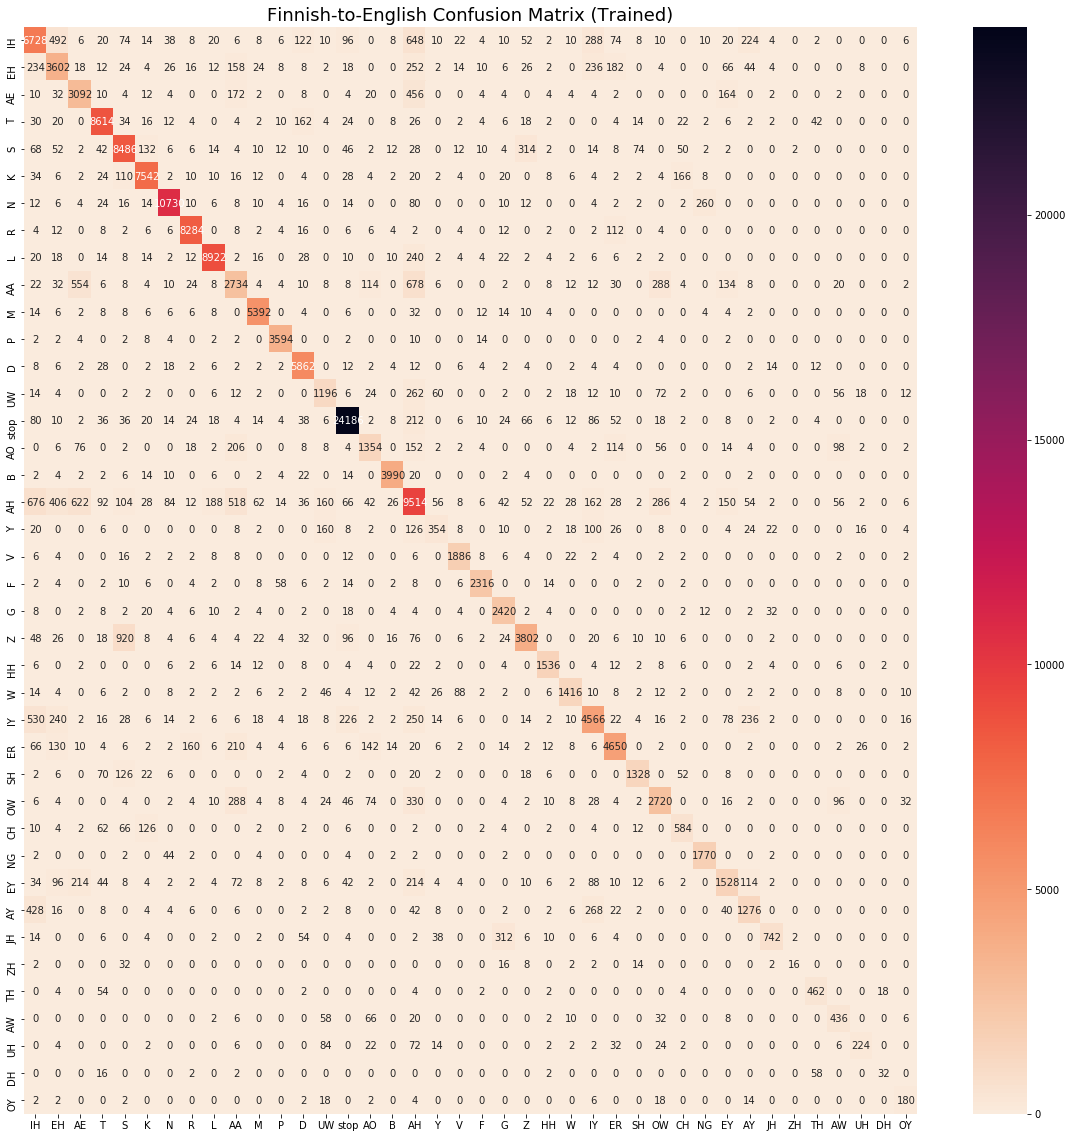

In [16]:
make_heatmap(finnish2english_preds, finnish2english_labels, 'Finnish-to-English Confusion Matrix (Trained)')

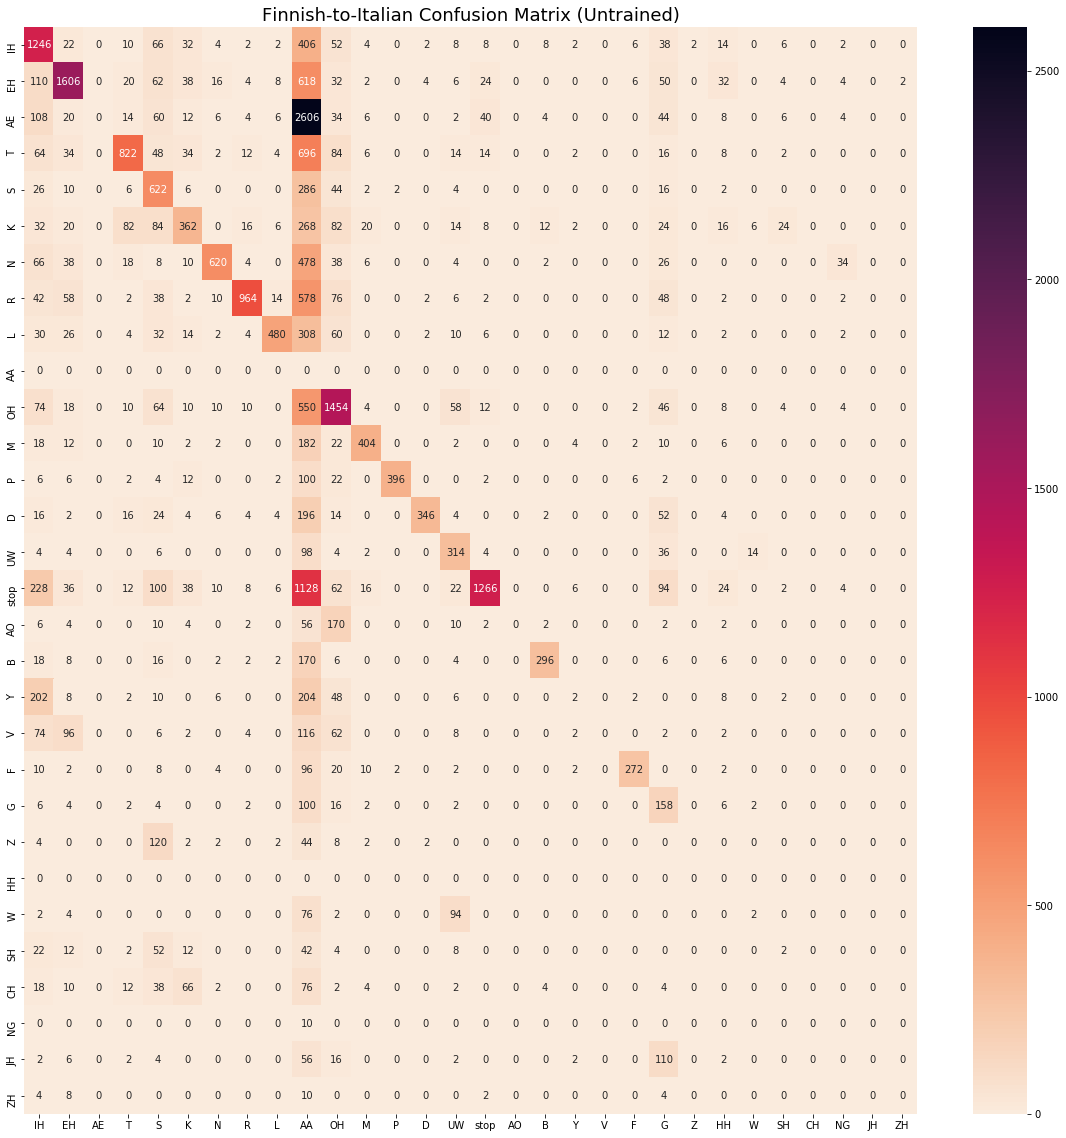

In [17]:
make_heatmap(finnish2italian_preds_bt, finnish2italian_labels_bt, 'Finnish-to-Italian Confusion Matrix (Untrained)')

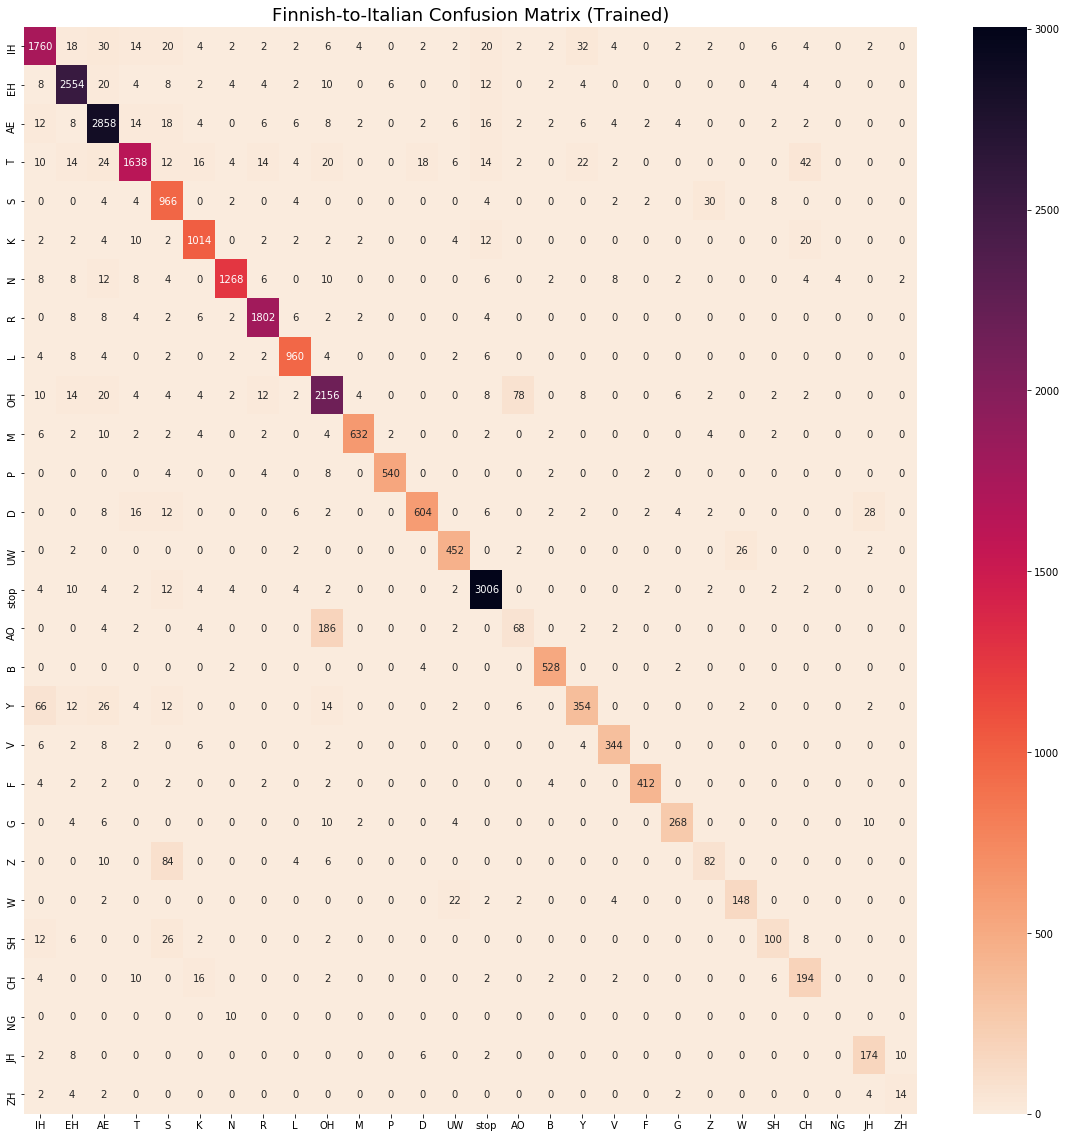

In [18]:
make_heatmap(finnish2italian_preds, finnish2italian_labels, 'Finnish-to-Italian Confusion Matrix (Trained)')

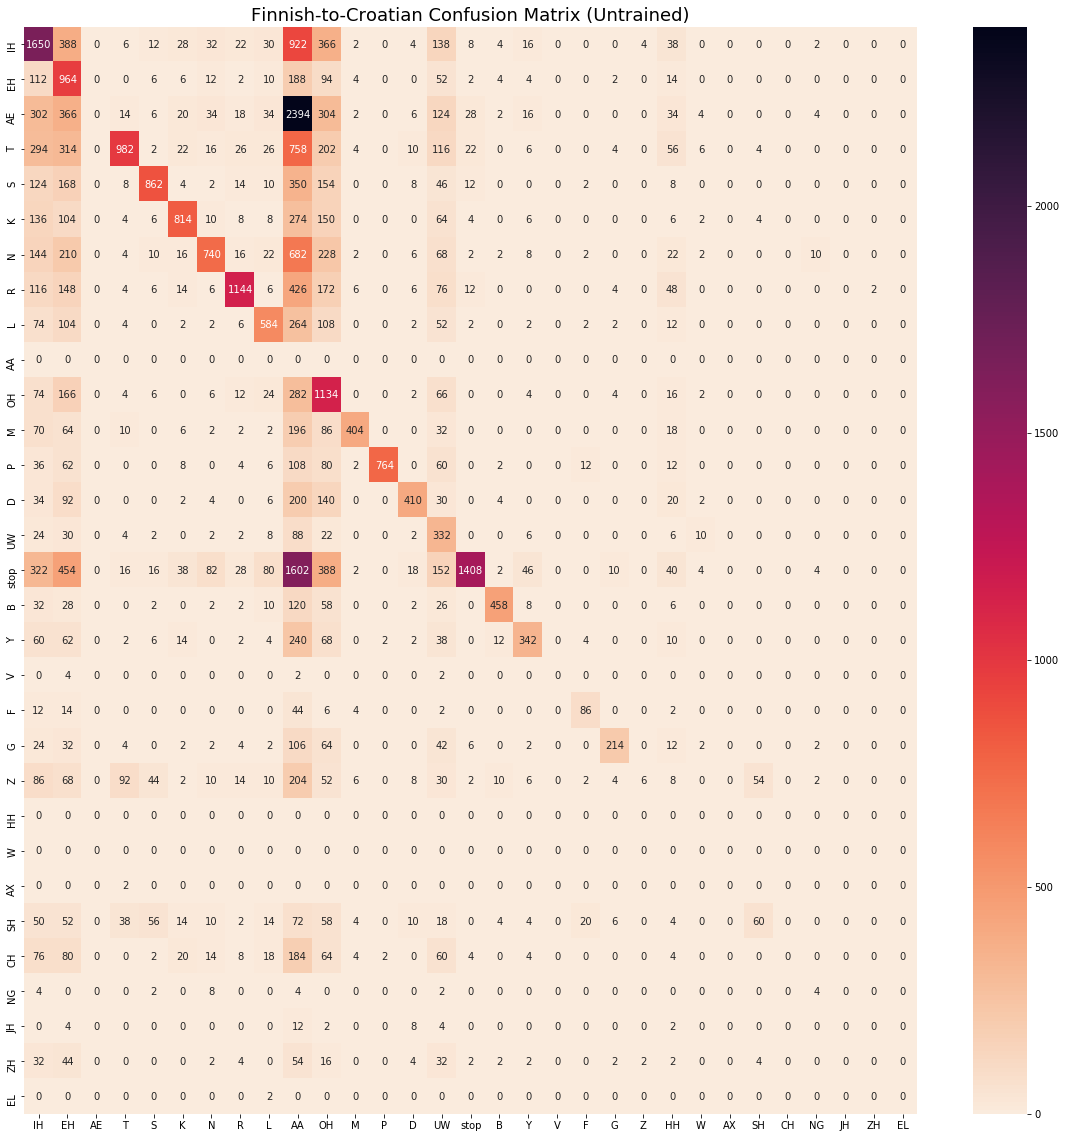

In [19]:
make_heatmap(finnish2croatian_preds_bt, finnish2croatian_labels_bt, 'Finnish-to-Croatian Confusion Matrix (Untrained)')

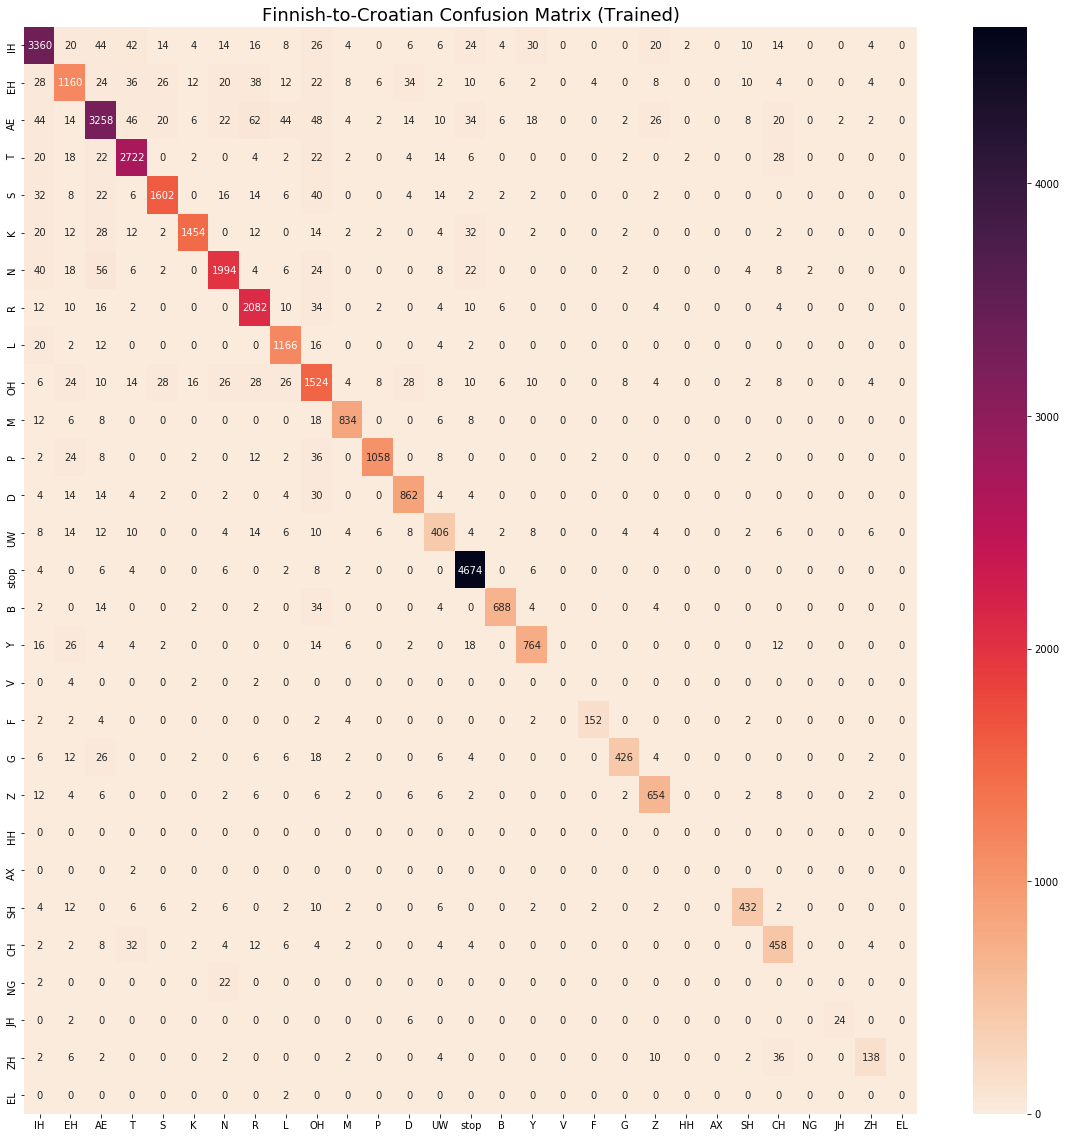

In [20]:
make_heatmap(finnish2croatian_preds, finnish2croatian_labels, 'Finnish-to-Croatian Confusion Matrix (Trained)')

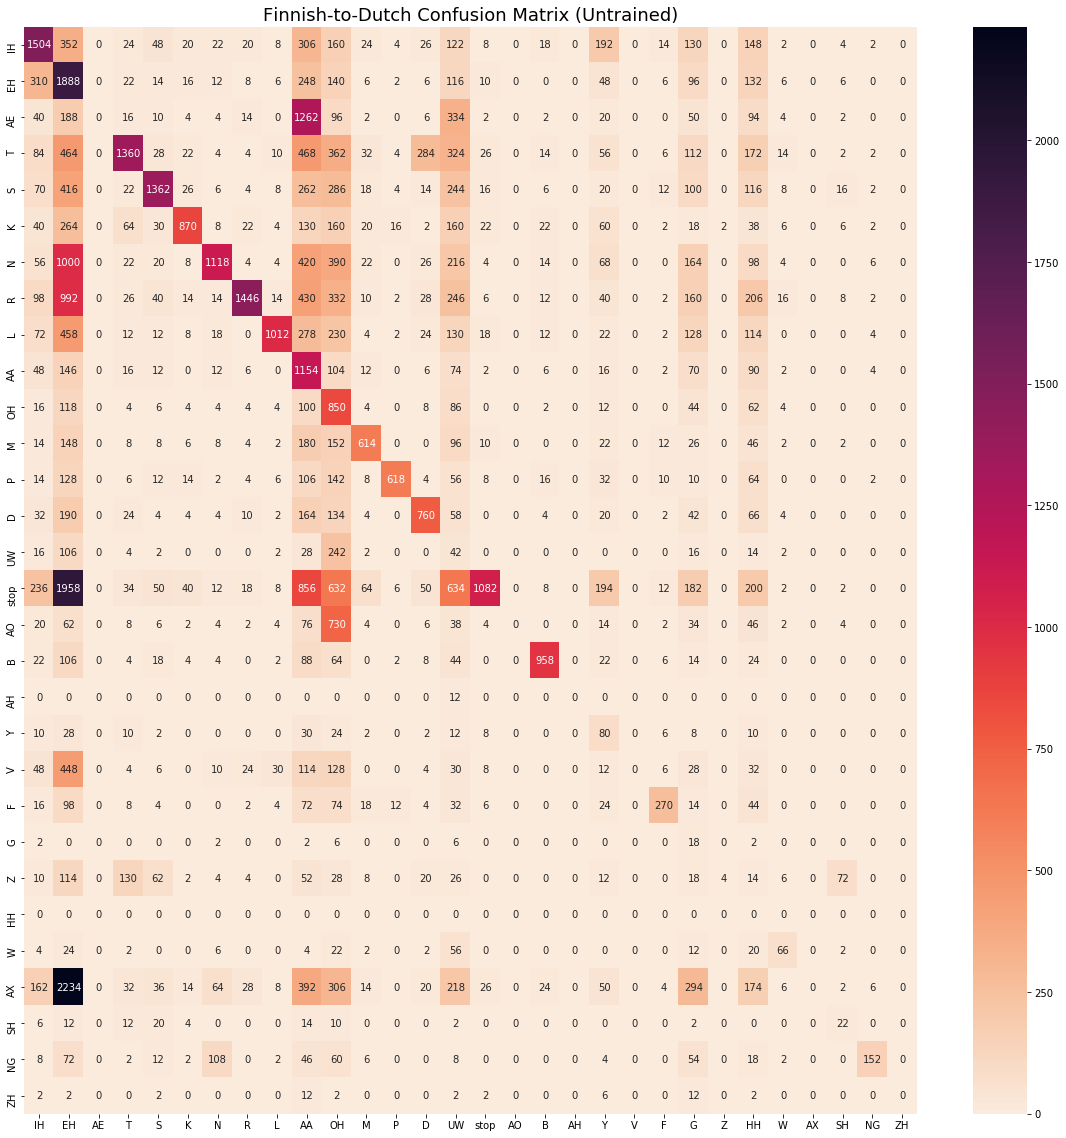

In [21]:
make_heatmap(finnish2dutch_preds_bt, finnish2dutch_labels_bt, 'Finnish-to-Dutch Confusion Matrix (Untrained)')

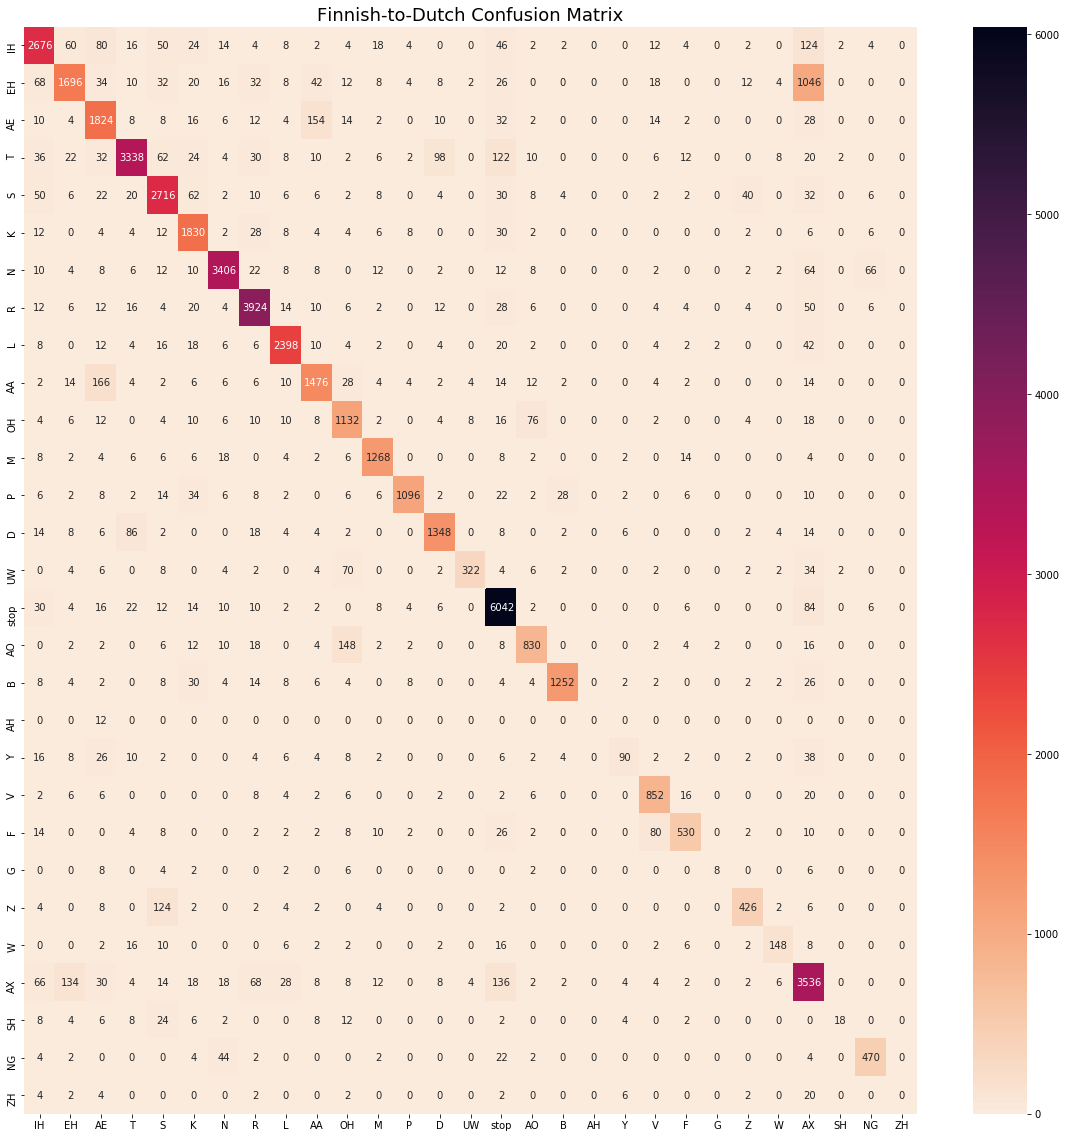

In [22]:
make_heatmap(finnish2dutch_preds, finnish2dutch_labels, 'Finnish-to-Dutch Confusion Matrix')

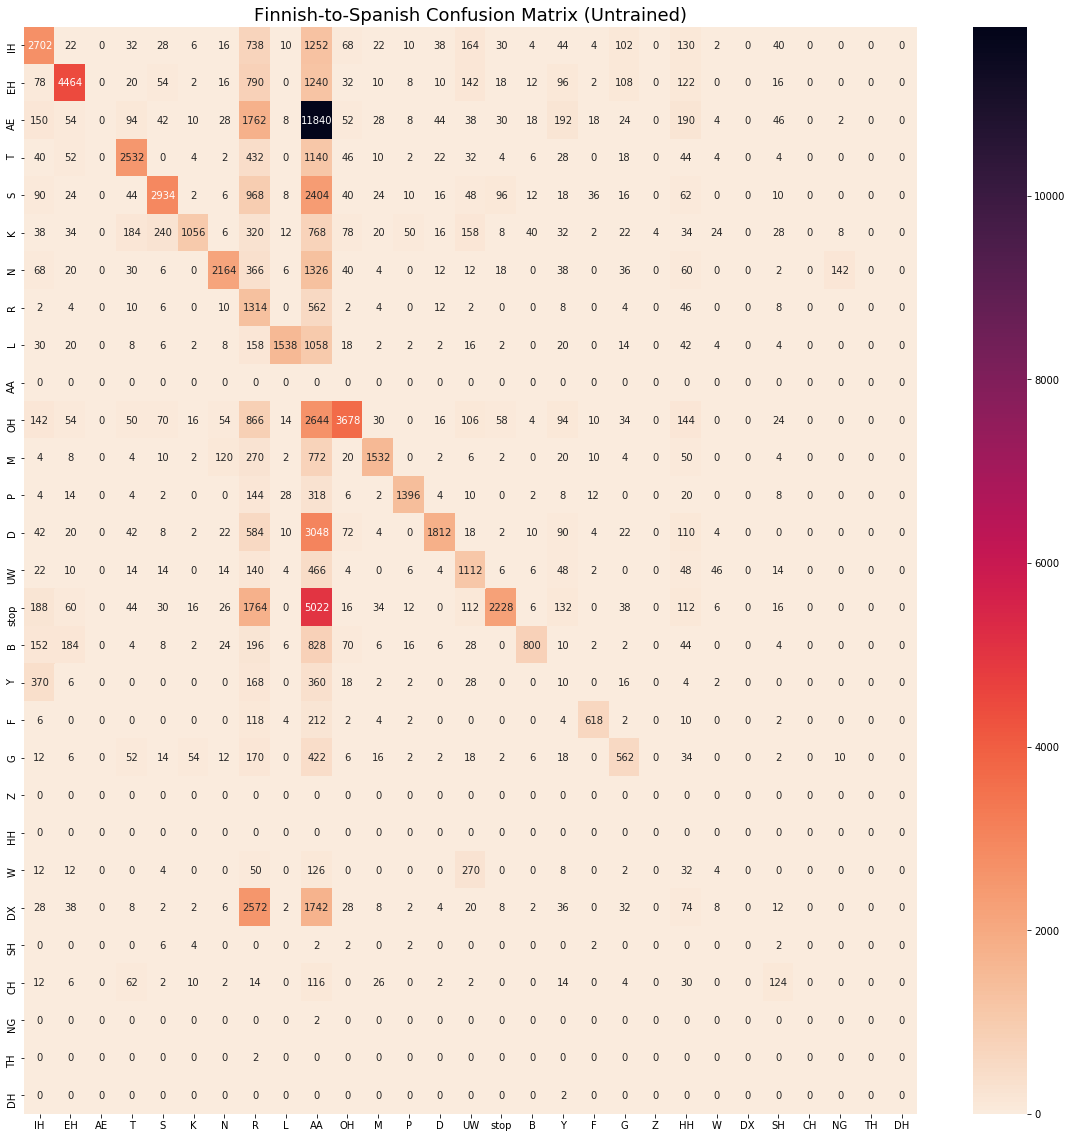

In [23]:
make_heatmap(finnish2spanish_preds_bt, finnish2spanish_labels_bt, 'Finnish-to-Spanish Confusion Matrix (Untrained)')

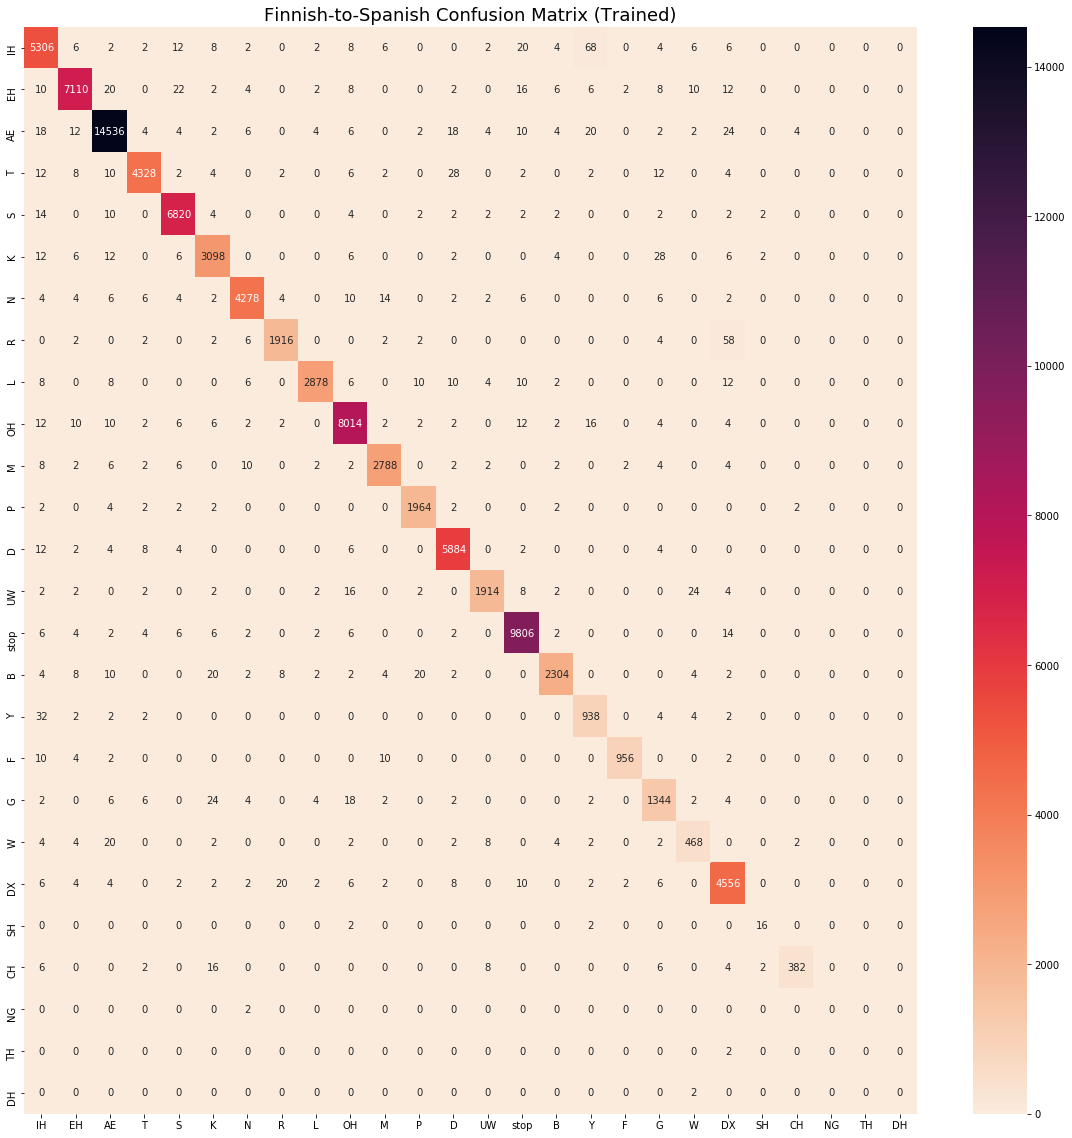

In [24]:
make_heatmap(finnish2spanish_preds, finnish2spanish_labels, 'Finnish-to-Spanish Confusion Matrix (Trained)')